예측을 위해 사용하는 데이터를 훈련 데이터셋(training dataset)이라고 합니다.  
학습이 끝난 후, 이 모델이 얼마나 잘 작동하는지 판별하는 데이터셋을 테스트 데이터셋(test dataset)이라고 합니다.

모델을 학습시키기 위한 데이터는 파이토치의 텐서의 형태(torch.tensor)를 가지고 있어야 합니다.  
그리고 입력과 출력을 각기 다른 텐서에 저장할 필요가 있습니다. 이때 보편적으로 입력은 x, 출력은 y를 사용하여 표기합니다.

In [1]:
import torch
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일입니다.

가설의 H를 따서 y 대신 다음과 같이 식을 표현하기도 합니다.  
이때 x와 곱해지는 **W를 가중치(Weight)**라고 하며, b를 편향(bias)이라고 합니다.  
**H(x)=Wx+b**

**비용 함수(cost function) = 손실 함수(loss function)** = 오차 함수(error function) = 목적 함수(objective function)  
특히 비용 함수와 손실 함수란 용어는 기억해두는 것이 좋습니다.

이때 데이터의 개수인 n으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 **평균 제곱 오차(Mean Squared Error, MSE)**라고 합니다.

이제 앞서 정의한 비용 함수(Cost Function)의 값을 최소로 하는 W와 b를 찾는 방법에 대해서 배울 차례입니다.  
이때 사용되는 것이 **옵티마이저(Optimizer)** 알고리즘입니다. **최적화 알고리즘**이라고도 부릅니다.  
그리고 이 옵티마이저 알고리즘을 통해 적절한 W와 b를 찾아내는 과정을 머신 러닝에서 학습(training)이라고 부릅니다.  
여기서는 가장 기본적인 옵티마이저 알고리즘인 **경사 하강법(Gradient Descent)**에 대해서 배웁니다.

 기계가 해야할 일은 cost가 가장 최소값을 가지게 하는 W를 찾는 일이므로, 맨 아래의 볼록한 부분의 W의 값을 찾아야 합니다.

학습률(learning rate)이라고 말하는 α는 어떤 의미를 가질까요? **학습률 α은 W의 값을 변경할 때, 얼마나 크게 변경할지를 결정합니다.**  
또는 W를 그래프의 한 점으로보고 접선의 기울기가 0일 때까지 경사를 따라 내려간다는 관점에서는 얼마나 큰 폭으로 이동할지를 결정합니다.  
직관적으로 생각하기에 학습률 α의 값을 무작정 크게 하면 접선의 기울기가 최소값이 되는 W를 빠르게 찾을 수 있을 것같지만 그렇지 않습니다.

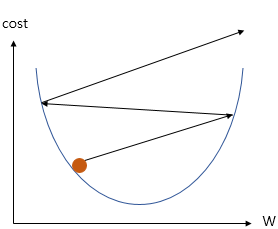
위의 그림은 학습률 α가 지나치게 높은 값을 가질 때, 접선의 기울기가 0이 되는 W를 찾아가는 것이 아니라 W의 값이 발산하는 상황을 보여줍니다.   
반대로 학습률 α가 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적당한 α의 값을 찾아내는 것도 중요합니다.

* 가설, 비용 함수, 옵티마이저는 머신 러닝 분야에서 사용되는 포괄적 개념입니다. 풀고자하는 각 문제에 따라 가설, 비용 함수, 옵티마이저는 전부 다를 수 있으며 **선형 회귀에 가장 적합한 비용 함수는 평균 제곱 오차**, **옵티마이저는 경사 하강법**입니다.

* * *
## 4. 파이토치로 선형 회귀 구현하기
### 1. 기본 셋팅

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### 1. torch
메인 네임스페이스입니다. 텐서 등의 다양한 수학 함수가 포함되어져 있으며 Numpy와 유사한 구조를 가집니다.  

#### 3. torch.nn  
신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어져 있습니다.  
예를 들어 RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수들이 있습니다.  

#### 4. torch.optim  
확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한 파라미터 최적화 알고리즘이 구현되어져 있습니다.

In [3]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

컴퓨터는 난수를 그냥 생성하는 것이 아닌 난수 생성 알고리즘을 사용해 난수를 생성한다고 합니다!!!(그래서 어려운가 봅니다)  
이때 이 **난수 알고리즘 실행하기 위해 쓰는 수를 Seed(씨앗)**이라 부릅니다.  
Seed를 11로 지정을 했을 때 값은 계속 계속!!!!!!! 같은 값만 나옵니다.  

### 2. 변수 선언

In [4]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


### 3. 가중치와 편향의 초기화
선형 회귀의 목표는 가장 잘 맞는 직선을 정의하는 W와 b의 값을 찾는 것입니다.

In [5]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True) 
# 가중치 W를 출력
print(W) 

tensor([0.], requires_grad=True)


In [6]:
# 편향 b도 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시
b = torch.zeros(1, requires_grad=True) 
print(b)

tensor([0.], requires_grad=True)


### 4. 가설 세우기

In [7]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### 5. 비용 함수 선언하기
파이토치 코드 상으로 **선형 회귀**의 **비용 함수**에 해당되는 **평균 제곱 오차를 선언**합니다.

In [8]:
# 앞서 배운 torch.mean으로 평균을 구한다.
cost = torch.mean((hypothesis - y_train) ** 2) 
print(cost) 

tensor(18.6667, grad_fn=<MeanBackward0>)


### 6. 경사 하강법 구현하기
경사 하강법을 구현합니다. 아래의 'SGD'는 경사 하강법의 일종입니다.  
lr은 학습률(learning rate)를 의미합니다. 학습 대상인 W와 b가 SGD의 입력이 됩니다.

In [9]:
optimizer = optim.SGD([W, b], lr=0.01)

In [10]:
# gradient를 0으로 초기화
optimizer.zero_grad() 
# 비용 함수를 미분하여 gradient 계산
cost.backward() 
# W와 b를 업데이트
optimizer.step() 

**optimizer.zero_grad()를 실행하므로서 미분을 통해 얻은 기울기를 0으로 초기화**합니다.  
기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있습니다.  
그 다음 **cost.backward() 함수를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산됩니다.**   
그 다음 경사 하강법 최적화 함수 opimizer의 .step() 함수를 호출하여,  
인수로 들어갔던 W와 b에서 리턴되는 변수들의 기울기에 학습률(learining rate) 0.01을 곱하여 빼줌으로서 업데이트합니다.
### 7. 전체코드

In [17]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad() # 미분값이 누적되므로, 미분값을 계속 0으로 초기화
    cost.backward() # 자동으로 미분이 계산
    optimizer.step() # lr 계산.. 업데이트

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/2000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008

**에포크(Epoch)**는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말합니다.  
이번 실습의 경우 2,000번을 수행했습니다.  

최종 훈련 결과를 보면 최적의 기울기 W는 2에 가깝고, b는 0에 가까운 것을 볼 수 있습니다.  
현재 훈련 데이터가 x_train은 [[1], [2], [3]]이고 y_train은 [[2], [4], [6]]인 것을 감안하면  
실제 정답은 W가 2이고, b가 0인 H(x)=2x이므로 거의 정답을 찾은 셈입니다.

## 5. optimizer.zero_grad()가 필요한 이유
파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있습니다. 예를 들어봅시다.

In [14]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


계속해서 미분값인 2가 누적되는 것을 볼 수 있습니다.  
그렇기 때문에 optimizer.zero_grad()를 통해 미분값을 계속 0으로 초기화시켜줘야 합니다.
## 6. torch.manual_seed()를 하는 이유
torch.manual_seed()를 사용한 프로그램의 결과는 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있습니다.  
torch.manual_seed()는 난수 발생 순서와 값을 동일하게 보장해준다는 특징때문입니다.

In [16]:
import torch
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1,3):
  print(torch.rand(1))

torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])
랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])
랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


* 텐서에는 **requires_grad**라는 속성이 있습니다. 이것을 True로 설정하면 자동 미분 기능이 적용됩니다.  
선형 회귀부터 신경망과 같은 복잡한 구조에서 파라미터들이 모두 이 기능이 적용됩니다.  
**requires_grad = True**가 적용된 텐서에 연산을 하면, **계산 그래프가 생성**되며   
**backward** 함수를 호출하면 그래프로부터 **자동으로 미분이 계산**됩니다.